In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
# from sympy import symbols, Matrix
# from fractions import Fraction
# xxx = symbols("x")

In [2]:
def plot(f, interval=[0, 10]):
    x = np.linspace(interval[0], interval[1], 1000)
    # y = f(x)
    y = list()
    for i in range(len(x)):
        y.append(f(x[i]))
    y = np.array(y)
    plt.figure()
    plt.plot(x, y, "bh", linewidth=1.1)


In [3]:
def plotmult(listF, interval=[0,10]):
    x = np.linspace(interval[0], interval[1], 1000)
    for f in listF:
        y = list()
        for i in range(len(x)):
            y.append(f(x[i]))
        y = np.array(y)
        plt.plot(x, y) 
    plt.show()

In [4]:
def deriv2p(X,Y,index=0):
    return (Y[1]-Y[0])/(X[1]-X[0])
    # erro < |Mh/2|, onde |f''(x)| < M, para x em [x0,x1]
    # O(h)

In [5]:
def deriv3p(X,Y,index=1):
    # equiespaçados
    # retorna f'(X[index])
    # lenX==lenY==3
    h = X[1]-X[0]
    def f0(Y): return - 3*Y[0] + 4*Y[1] - Y[2] 
    def f1(Y): return - Y[0] + Y[2] 
    def f2(Y): return Y[0] - 4*Y[1] + 3*Y[2] 
    fs = {0:f0,1:f1,2:f2}
    f = fs[index]
    return f(Y)/(2*h)
    # O(h^2)

In [6]:
def deriv5p(X,Y,index=2):
    # equiespaçados
    # retorna f'(X[index])
    # lenX==lenY==5
    difs = {0:1,2:1,3:-1}
    def fCenter(Y,d,index): return Y[0]-8*Y[1]+8*Y[3]-Y[4]
    def fExt(Y,d,i): return -25*Y[i] +48*Y[i+d]-36*Y[i+2*d]+16*Y[i+3*d]-3*Y[i+4*d]
    fs = {0:fExt,2:fCenter,4:fExt}
    hs =  {0:X[1]-X[0],2:X[1]-X[0],3:X[0]-X[1]} 
    f = fs[index]
    return f(Y,difs[index],index)/(12*hs[index])
    #O(h^4)


In [7]:
def segDeriv3p(X,Y):
    # equiespacados
    # no ponto médio
    h = X[1]-X[0]
    f = Y[0]-2*Y[1]+Y[2]
    return f/(h**2)
    # O(h^2)


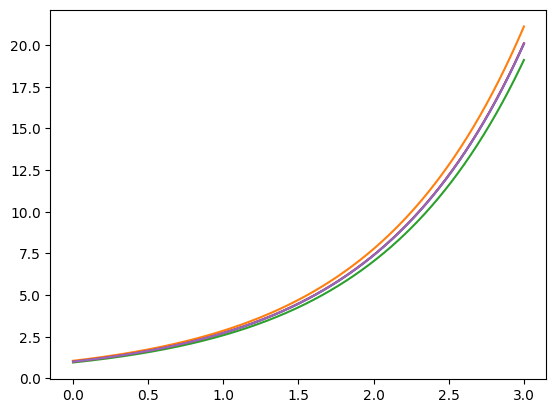

In [8]:
def f(x): return np.exp(x)
def f2f(x): return deriv2p([x,x+0.1],[f(x),f(x+0.1)])
def f2b(x): return deriv2p([x,x-0.1],[f(x),f(x-0.1)])
def f3c(x): return deriv3p([x-0.1,x,x+0.1],[f(x-0.1),f(x),f(x+0.1)])
def f5c(x): return deriv5p([x-0.2,x-0.1,x,x+0.1,x+0.2],[f(x-0.2),f(x-0.1),f(x),f(x+0.1),f(x+0.2)])
plotmult([f,f2f,f2b,f3c,f5c],[0,3])

In [9]:
def richardson(LN1):
    # LN1 = [N1(h),N1(h/2),...,N1(h / 2^(n-1))]
    # onde f(h) = N1(h) + K1*h^2 +k2*h^4 + ... 
    n = len(LN1)
    M = np.zeros((n,n))
    for j in range(n):
        M[j,0] = LN1[j]
    
    # M[j,i] = N_(i+1)(h/(2^(j-1)))
    for i in range(1,n):
        for j in range(i,n):
            res = M[j,i-1]+(M[j,i-1]-M[j-1,i-1])/(4**(i)-1)
            #print(f'N_{i+1}(h/{(2**(j-i))}) : {M[j,i-1]} +{(M[j,i-1]-M[j-1,i-1])}/{(4**(i)-1)} = {res}')
            #print()
            M[j,i] = res
    
    return M

In [10]:
def f(x): return x*np.exp(x)
def fl(x,h): return deriv3p([x-h,x,x+h],[f(x-h),f(x),f(x+h)],1) 
def f2(h): return fl(2,h)
h=0.2
richardson([f2(h),f2(h/2),f2(h/4),f2(h/8)])

array([[22.41416066,  0.        ,  0.        ,  0.        ],
       [22.22878688, 22.16699562,  0.        ,  0.        ],
       [22.18256486, 22.16715752, 22.16716831,  0.        ],
       [22.17101693, 22.16716762, 22.1671683 , 22.1671683 ]])

In [11]:
np.exp(2)*(1+2)

22.16716829679195

In [12]:

# LN1 = [N1(h),N1(h/2),...,N1(h / 2^(n-1))]
# onde f(h) = N1(h) + K1*h^2 +k2*h^4 + ... 
LN1 = [1.570796, 1.896119, 1.974232, 1.993570]
nh,nh2,nh4,nh8 = LN1
richardson(LN1)

array([[1.570796  , 0.        , 0.        , 0.        ],
       [1.896119  , 2.00456   , 0.        , 0.        ],
       [1.974232  , 2.00026967, 1.99998364, 0.        ],
       [1.99357   , 2.000016  , 1.99999909, 1.99999933]])

In [13]:
LN1 = [1.570796, 1.896119, 1.974232, 1.993570]
nh,nh2,nh4,nh8 = LN1

In [14]:
def rich(nh,nh2,j):
    print(nh2, (nh2-nh),(4**(j-1)-1) )
    return nh2 + (nh2-nh)/(4**(j-1)-1)

In [15]:
print(rich(nh,nh2,2))
print(rich(nh2,nh4,2))
print(rich(nh4,nh8,2))

1.896119 0.32532300000000003 3
2.00456
1.974232 0.07811299999999988 3
2.0002696666666666
1.99357 0.019338000000000077 3
2.000016


In [16]:
def h(t):
    u = (t+1)/2
    res = u**2 * np.exp(-u) / 2
    print(res)
    return res

In [17]:
c1 = h(np.sqrt(3/5)) 
c2 = h(0)
c3 = h(-np.sqrt(3/5)) 

res = (5*c1 + 8*c2 + 5*c3)/9
certo = (2*np.e-5) / np.e
print(certo)
print(res)


0.16209162142337447
0.07581633246407918
0.005673942890153483
0.1606027941427883
0.16059538680891924


In [18]:
print(abs(res-certo))
print((res-certo)/certo)
print()

7.407333869058341e-06
-4.6122073458277747e-05



In [19]:
def CompositeSimpsonRule(f,a,b,n):
    h = (b-a)/n
    X0 = f(a) + f(b)
    X1 = 0
    X2 = 0
    for i in range(1,n):
        x = a+i*h
        if i % 2 == 0:
            X2 += f(x)
        else:
            X1 += f(x)

    return h*(X0+4*X1+2*X2)/3

In [20]:
f = np.exp
a=0
b=100
real=f(b)-f(a)
print(real)
for n in [10,100,1000,10000]:
    res = CompositeSimpsonRule(f,a,b,n)
    print('---')
    print(res)
    print(abs(res-real))
    print((abs(res-real))/real)

2.6881171418161356e+43
---
8.962017714053713e+43
6.273900572237578e+43
2.3339386794724386
---
2.7014426241215457e+43
1.3325482305410045e+41
0.0049571806593246654
---
2.6881186334385725e+43
1.4916224368497306e+37
5.548948792618339e-07
---
2.6881171419654807e+43
1.4934508633938828e+33
5.555750678279158e-11


In [21]:
def RombergWrong(f,a,b,n):
    #R[A,B] aqui -> R_{A+1,B+1} livro
    R = np.zeros((n,n))
    h=b-a
    R[0,0] = h*(f(a)+f(b))/2
    # saida r11
    for i in range(1,n):
        # i = 1,...,n-1
        # I livro = 1
        # i meu = 0 
        # meu = livro - 1
        # i = I-1
        soma = 0
        for k in range(1,2**(i-1)+1): 
            soma += f(a+(k-0.5)*h)
        R[1,0] = (R[0,0] + h*soma )/2

        for j in range(1,i+1):
            # J = 2...,I
            # = 2,...i+1 
            # para indexar, j = 1,..,i
            # para contas, usar j+1
            R[1,j] = R[1,j-1] + (R[1,j-1] - R[0,j-1])/(4**(j)-1)
        # saida r2j para j = 1,...,i
        h=h/2
        for j in range(0,i+1):
            # so indexar. 1,...I
            # 1,...,i+1 livro
            # 0,...,i aq
            R[0,j] = R[1,j]
        
        return R

In [22]:
def CompositeTrapezoidalRule(f,a,b,n):
    h=(b-a)/n
    soma = f(a)+f(b)
    for i in range(1,n):
        x = a+i*h
        soma += 2*f(x)
    return h*soma/2

In [23]:
f = np.exp
a=0
b=100
real=f(b)-f(a)
print(real)
for n in [10,100,1000,10000]:
    res = CompositeTrapezoidalRule(f,a,b,n)
    print('---')
    print(res)
    print(abs(res-real))
    print((abs(res-real))/real)

2.6881171418161356e+43
---
1.3441806167783736e+44
1.0753689025967601e+44
4.000454019910097
---
2.9084801327812087e+43
2.2036299096507307e+42
0.08197670686932648
---
2.690356866173598e+43
2.2397243574625263e+40
0.0008331944775105047
---
2.688139542754988e+43
2.2400938852243385e+38
8.333319446454237e-06


In [24]:
def RombergAlgorithm(f,a,b,n):
    h = [(b-a)/2**(k-1) for k in range(1,n+1)]
    r = [h[0]*(f(a)+f(b))/2]
    for k in range(1,n):
        soma = 0
        for i in range(1,2**(k-1)+1):
            soma += f(a + (2*i-1)*h[k])
        r.append( (r[k-1] + h[k-1] * soma)/2 )
    return richardson(r)[n-1,n-1]
    

In [25]:
def RombergTrapezoidal(f,a,b,n):
    r = []
    for k in range(n):
        r.append( CompositeTrapezoidalRule(f,a,b,2**k))
    return richardson(r)[n-1,n-1]

In [26]:
f = np.sin
a=0
b=np.pi
real=2
res = RombergAlgorithm(f,a,b,4)
print(res)
res = RombergTrapezoidal(f,a,b,4)
print(res)
#print(richardson(res['r2']))
# print(real)
# for n in [3,5,8]:
#     print('---')
#     res = romberg1(f,a,b,n)
#     print(res)
    #print(abs(res-real))
    #print((abs(res-real))/real)

2.000005549979671
2.000005549979671


In [27]:
def intSin(f,n,method):
    pi = np.pi
    def h(x): return f(x) * np.sin(n*x)
    return method(h,-pi,pi,10)

def intCos(f,n,method):
    pi = np.pi
    def h(x): return f(x) * np.cos(n*x)
    return method(h,-pi,pi,10)



In [39]:
method = RombergAlgorithm
pi = np.pi
f = np.exp
m = 100

a = [method(f,-pi,pi,10)/(2*pi)]
b = [0]
for i in range(1,m):
    ai = intCos(f,i,method)/pi
    bi = intSin(f,i,method)/pi
    a.append(ai)
    b.append(bi)

print(a)
print(b)
print()
def FS(x):
    return sum([ a[i]*np.cos(i*x) + b[i]*np.sin(i*x) for i in range(m) ])

x =  np.linspace(-pi,pi,100)
fx = f(x)
FSx = FS(x)
print(np.mean(abs(fx - FSx))) 
plotmult([f,FS],[-pi,pi])


KeyboardInterrupt: 

In [ ]:


def calc_e():
    def f(x): return 1/x
    a = 1
    ini=2
    fim=3
    res = 0
    iter=0
    erro=1
    while erro > 10e-15:
        iter+=1
        bs = np.linspace(ini,fim,10)
        dif = bs[1]-bs[0]
        lres = [RombergAlgorithm(f,a,b,10) for b in bs]
        L = list(abs(np.array(lres)-1))
        minm = min(L)
        idx = L.index(minm)
        res = lres[idx]
        e = bs[idx]
        print(e)
        ini = e+dif
        fim = e-dif
        erro = abs(e-np.e) 
    print(iter)
    return e 

        

def testa_precisao_old():
    def f(x): return 1/x
    X = 5
    Xinv = 0.2

    res = np.log(X)
    rom1 = RombergAlgorithm(f,1,X,10)
    rom2 = RombergAlgorithm(f,Xinv,1,10)
    simp1 = CompositeSimpsonRule(f,1,X,1000)
    simp2 = CompositeSimpsonRule(f,Xinv,1,1000)
    lres = np.array([rom1,rom2,simp1,simp2])
    for apr in lres:
        print()
        print(apr)
        print(abs(apr-res))


    return


In [ ]:

def teste_integral_seno():
    def f(x): return np.sin(10*x) * np.exp(x) #np.sin(2*x) + abs(x)
    def method1(f,a,b): return CompositeSimpsonRule(f,a,b,100)
    def method2(f,a,b): return RombergAlgorithm(f,a,b,10)
    def method3(f,a,b): return QuadGauss(f,a,b,5)
    A=[]
    B=[]
    pi = np.pi
    for method in [method1,method2,method3]:
        print(method(f,-pi,pi))
    #     dic = fourier(method,f)
    #     A.append(dic['a'])
    #     B.append(dic['b'])

    # for a in A:
    #     print(a)

    # for b in B:
    #     print(b)